In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

#Classification with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Lade DataFrame Walk
df_walk_Acc= pd.read_csv('data/NormalWalk/Accelerometer.csv')
df_walk_Gyr= pd.read_csv('data/NormalWalk/Gyroscope.csv')
df_walk_Ori= pd.read_csv('data/NormalWalk/Orientation.csv')

# Lade DataFrame PushUps
df_push_Acc= pd.read_csv('data/PushUps/Accelerometer.csv')
df_push_Gyr= pd.read_csv('data/PushUps/Gyroscope.csv')
df_push_Ori= pd.read_csv('data/PushUps/Orientation.csv')

# Lade DataFrame JumpingJacks
df_JJ_Acc= pd.read_csv('data/JJ_rightHand/Accelerometer.csv')
df_JJ_Gyr= pd.read_csv('data/JJ_rightHand/Gyroscope.csv')
df_JJ_Ori= pd.read_csv('data/JJ_rightHand/Orientation.csv')

In [ ]:
df_push_Acc.head(10)
#ggf. spalten umbennen zb. z zu z_Acc etc. 
#ggf. Spalten dropen die ich nicht brauche wie yawn, pitch, roll oder so, mal schauen wie die Daten aussehen

<Axes: xlabel='time'>

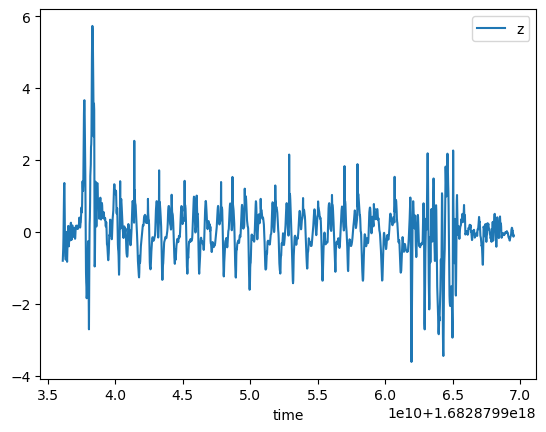

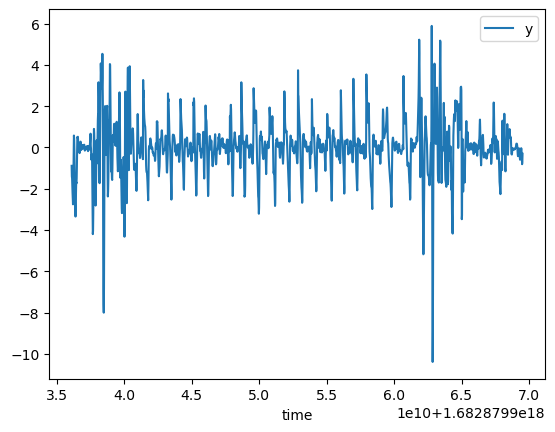

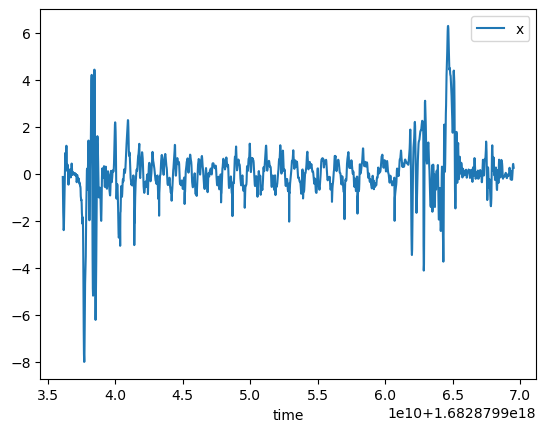

In [10]:
df_push_Gyr.plot(x='time', y='z', kind='line')
df_push_Gyr.plot(x='time', y='y', kind='line')
df_push_Gyr.plot(x='time', y='x', kind='line')

In [11]:
#Plotting Gyroscope Data
#Function to plot Gyr Data
def plotDataGyr(data, title):
    plt.plot(data['time'], data['z'], color='red', marker='.')
    plt.plot(data['time'], data['y'], color='blue', marker='.')
    plt.plot(data['time'], data['x'], color='green', marker='.')
    plt.xlabel('time')
    plt.ylabel('x,y,z')
    plt.legend(['z', 'y', 'x'])
    plt.title(title)
    plt.show()

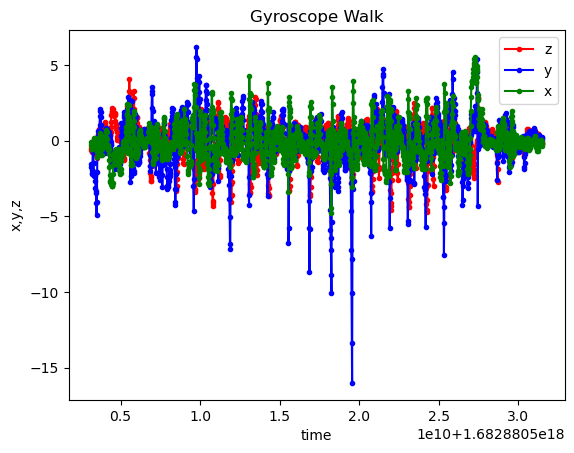

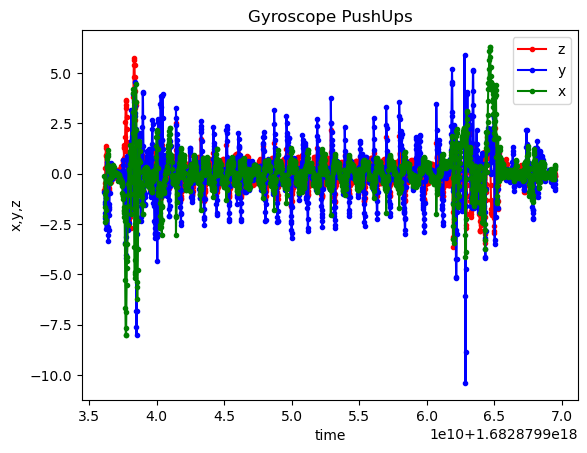

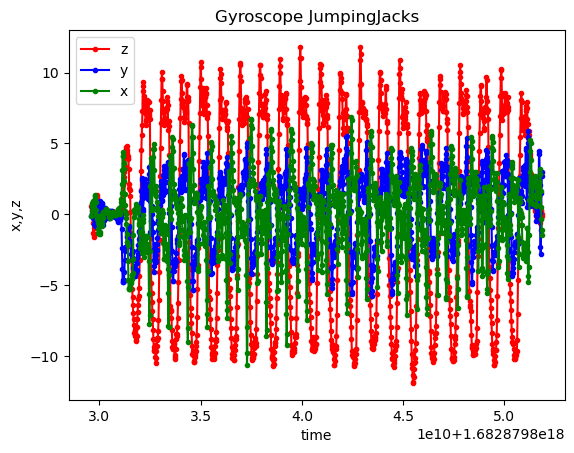

In [15]:
#Plot Walk
plotDataGyr(df_walk_Gyr, 'Gyroscope Walk')

#Plot PushUps
plotDataGyr(df_push_Gyr, 'Gyroscope PushUps')

#Plot JumpingJacks
plotDataGyr(df_JJ_Gyr, 'Gyroscope JumpingJacks')

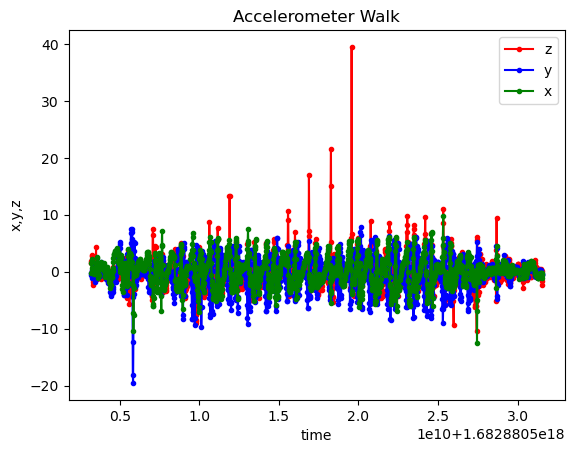

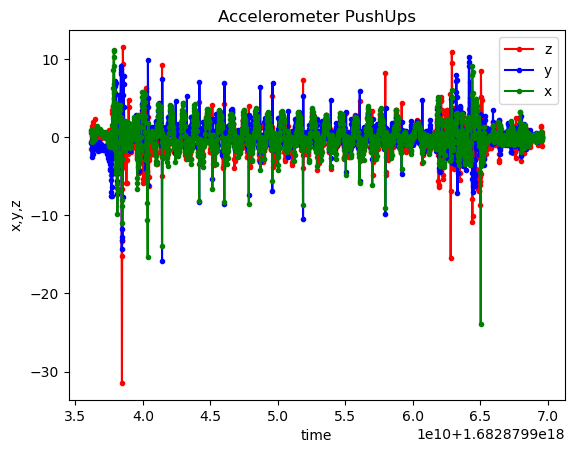

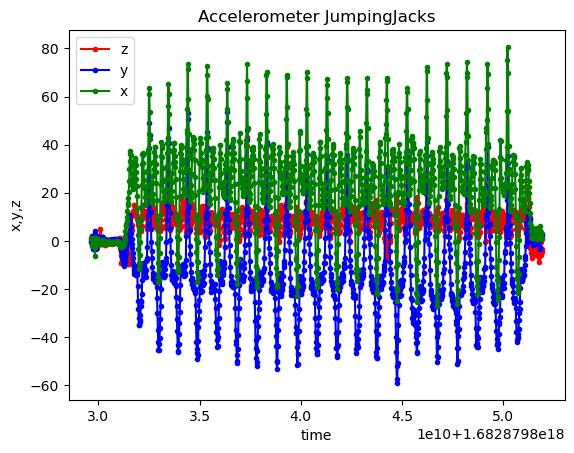

In [16]:
#Plotting Accelerometer Data
#Function to Plot Acc Data
def plotDataAcc(data, title):
    plt.plot(data['time'], data['z'], color='red', marker='.')
    plt.plot(data['time'], data['y'], color='blue', marker='.')
    plt.plot(data['time'], data['x'], color='green', marker='.')
    plt.xlabel('time')
    plt.ylabel('x,y,z')
    plt.legend(['z', 'y', 'x'])
    plt.title(title)
    plt.show()

#Plot Walk
plotDataAcc(df_walk_Acc, 'Accelerometer Walk')

#Plot PushUps
plotDataAcc(df_push_Acc, 'Accelerometer PushUps')

#Plot JumpingJacks
plotDataAcc(df_JJ_Acc, 'Accelerometer JumpingJacks')

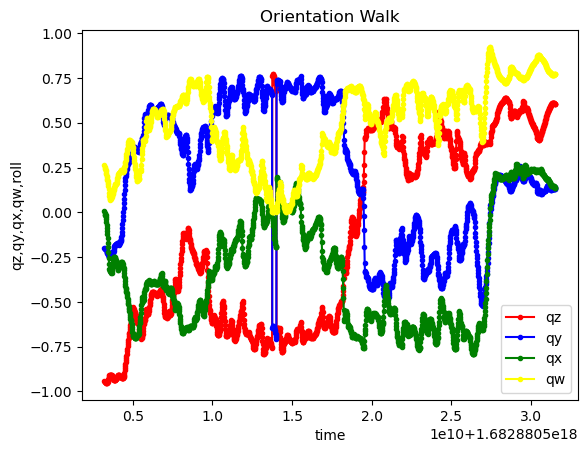

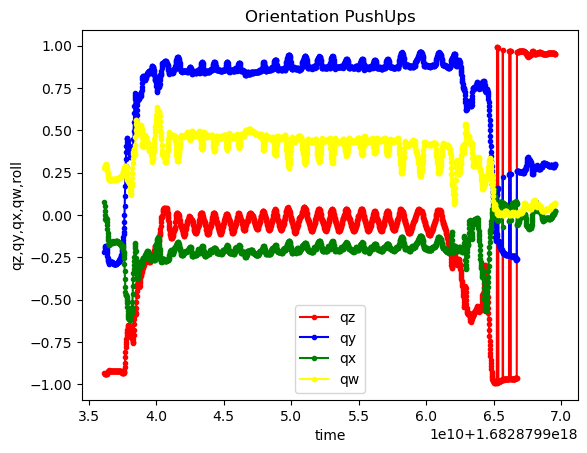

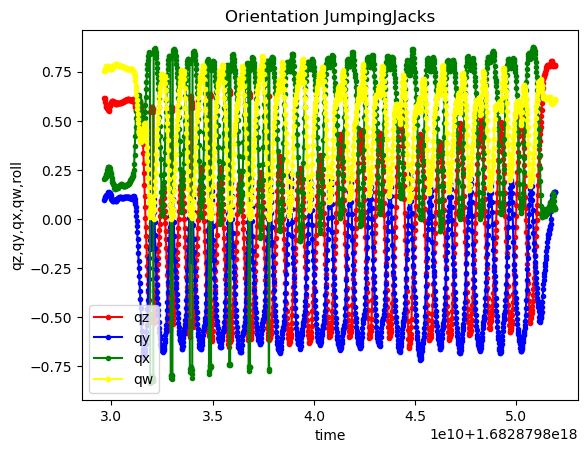

In [17]:
#Plotting Orientation Data
#Function to Plot Ori Data
def plotDataOri(data, title):
    plt.plot(data['time'], data['qz'], color='red', marker='.')
    plt.plot(data['time'], data['qy'], color='blue', marker='.')
    plt.plot(data['time'], data['qx'], color='green', marker='.')
    plt.plot(data['time'], data['qw'], color='yellow', marker='.')
    #plt.plot(data['time'], data['roll'], color='black', marker='.')
    plt.xlabel('time')
    plt.ylabel('qz,qy,qx,qw,roll')
    plt.legend(['qz', 'qy', 'qx', 'qw', 'roll'])
    plt.title(title)
    plt.show()

#Plot Walk
plotDataOri(df_walk_Ori, 'Orientation Walk')

#Plot PushUps
plotDataOri(df_push_Ori, 'Orientation PushUps')

#Plot JumpingJacks
plotDataOri(df_JJ_Ori, 'Orientation JumpingJacks')
    

In [3]:
#Concat DataFrames Walk
df_walk_Gyr.drop(['time','seconds_elapsed'], axis=1, inplace=True)
df_walk_Ori.drop(['time','seconds_elapsed'], axis=1, inplace=True)
df_walk = pd.concat([df_walk_Acc, df_walk_Gyr, df_walk_Ori], axis=1)

In [7]:
df_walk.describe()


,time,seconds_elapsed,z,y,x,z,y,x,qz,qy,qx,qw,roll,pitch,yaw
count,1.694000e+03,1694.000000,1694.000000,1694.000000,1694.000000,1681.000000,1681.000000,1681.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,1.682881e+18,14.432816,-0.121552,-0.373166,0.089478,-0.019391,-0.120319,-0.062751,-0.127767,0.215725,-0.319543,0.492777,0.769793,0.975094,0.008908
std,8.230018e+09,8.230018,2.596474,2.776900,2.452725,1.157702,1.672906,1.281182,0.532667,0.392741,0.318049,0.231129,1.027377,0.713344,1.800885
min,1.682881e+18,0.164202,-10.472376,-19.543915,-12.545299,-4.728555,-16.007418,-4.801706,-0.953105,-0.708056,-0.792790,0.000083,-3.127478,-0.679715,-3.140655
25%,1.682881e+18,7.305930,-1.398104,-1.733250,-1.494583,-0.501215,-0.847423,-0.827417,-0.645438,-0.162629,-0.612545,0.294501,0.042526,1.099068,-1.386632
50%,1.682881e+18,14.447629,-0.236431,-0.108898,0.133959,0.189826,0.050091,-0.164475,-0.229349,0.212383,-0.375353,0.542476,0.866653,1.291218,0.119788
75%,1.682881e+18,21.589284,0.796619,1.053636,1.559253,0.683711,0.824057,0.519235,0.415051,0.598199,-0.053658,0.681756,1.631679,1.415777,1.555345
max,1.682881e+18,28.503113,39.480579,7.832360,9.757957,4.086230,6.199366,5.510310,0.771277,0.763218,0.268756,0.923564,3.138131,1.566113,3.139913


In [4]:
#Concat DataFrames PushUps
df_push_Gyr.drop(['time','seconds_elapsed'], axis=1, inplace=True)
df_push_Ori.drop(['time','seconds_elapsed'], axis=1, inplace=True)
df_push = pd.concat([df_push_Acc, df_push_Gyr, df_push_Ori], axis=1)
df_push.head(10)

,time,seconds_elapsed,z,y,x,z,y,x,qz,qy,qx,qw,roll,pitch,yaw
0,1682879936169797600,0.193798,-1.567480,-0.585421,0.792424,-0.804662,-0.890642,-0.137750,-0.932446,-0.221447,0.075960,0.275203,0.022202,-0.472128,2.572947
1,1682879936186679000,0.210679,0.508947,-0.816701,0.964334,-0.647517,-1.406670,-1.012204,-0.936937,-0.207875,0.051858,0.276131,-0.019405,-0.431431,2.564134
2,1682879936203543800,0.227544,-0.407520,-2.509296,0.118777,-0.459218,-1.498758,-1.637577,-0.939115,-0.196961,0.024451,0.280486,-0.069973,-0.393750,2.547157
3,1682879936220417800,0.244418,0.004203,-1.372980,0.451478,-0.178220,-1.946369,-2.109318,-0.938782,-0.190478,-0.002688,0.287054,-0.122735,-0.364083,2.525483
4,1682879936237296400,0.261296,0.835952,-0.857827,-0.469311,0.304211,-2.204154,-2.401006,-0.937177,-0.186388,-0.022230,0.294049,-0.161337,-0.342968,2.505527
5,1682879936254168300,0.278168,1.381095,-0.397673,-0.645828,0.877813,-2.459954,-2.292883,-0.936213,-0.182644,-0.032467,0.298484,-0.180393,-0.328481,2.494351
6,1682879936271039000,0.295039,1.982050,-0.150773,0.685421,1.293507,-2.755766,-1.811826,-0.936360,-0.180586,-0.031683,0.299357,-0.177630,-0.324904,2.493539
7,1682879936287911700,0.311912,0.230510,-0.141869,0.279161,1.358106,-2.126117,-1.204932,-0.937045,-0.183294,-0.024904,0.296191,-0.165141,-0.334987,2.501303
8,1682879936304781600,0.328781,0.126333,-2.126875,0.600989,0.932486,-1.213178,-0.844216,-0.937353,-0.189848,-0.018942,0.291492,-0.156381,-0.352096,2.510731
9,1682879936321654300,0.345654,1.225633,-1.664281,-0.412267,0.284358,-0.092852,-0.382402,-0.938061,-0.195629,-0.019284,0.285304,-0.158837,-0.364006,2.521796


In [5]:
#Concat DataFrames JumpingJacks
df_JJ_Gyr.drop(['time','seconds_elapsed'], axis=1, inplace=True)
df_JJ_Ori.drop(['time','seconds_elapsed'], axis=1, inplace=True)
df_JJ = pd.concat([df_JJ_Acc, df_JJ_Gyr, df_JJ_Ori], axis=1)
df_JJ.head(-20)

,time,seconds_elapsed,z,y,x,z,y,x,qz,qy,qx,qw,roll,pitch,yaw
0,1682879829644700400,0.197700,0.247896,-0.302020,1.391320,0.588874,-0.096211,-0.076205,0.614930,0.096542,0.204705,0.755405,-0.117447,-0.442283,-1.392921
1,1682879829661591300,0.214591,-0.839892,0.808964,0.504949,0.552833,-0.135459,0.250455,0.613941,0.105724,0.207268,0.754280,-0.106146,-0.458376,-1.391155
2,1682879829678456800,0.231457,-1.454709,2.047860,-1.821745,0.450819,0.095600,0.561843,0.608168,0.111593,0.210562,0.757194,-0.097966,-0.471931,-1.376934
3,1682879829695329000,0.248329,-1.158190,1.843092,-1.915896,0.296575,0.509767,0.784046,0.598106,0.113505,0.212696,0.764295,-0.091317,-0.479010,-1.350345
4,1682879829712205300,0.265205,-1.149807,0.030297,-0.715421,-0.057421,0.680962,0.926072,0.587303,0.115688,0.214443,0.771820,-0.082991,-0.485794,-1.321499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1682879851509753600,22.062754,-4.258976,-0.084552,2.580932,1.127199,0.954630,2.021506,0.782068,-0.118861,0.032862,0.610870,-0.200072,0.146287,-1.800670
1297,1682879851526625800,22.079626,-4.449793,0.388968,2.404356,1.419651,1.611157,2.007914,0.784059,-0.098146,0.039476,0.611606,-0.184017,0.105814,-1.806905
1298,1682879851543494000,22.096494,-5.718020,-0.870657,4.413633,0.856586,1.628719,2.389705,0.785159,-0.084926,0.046162,0.611704,-0.177847,0.076962,-1.811017
1299,1682879851560367400,22.113367,-3.811452,0.424196,3.927109,0.357967,1.240362,2.685669,0.786115,-0.079827,0.053178,0.610592,-0.182434,0.060603,-1.815278


In [12]:
#Classification with KNN
import pickle as pkl
#Function to label the data
def getData(data, label):
    data['label'] = label
    return data

#Label Data Walk
df_walk = getData(df_walk, 'walk')
#df_walk.head(10)

#Label Data PushUps
df_push = getData(df_push, 'pushups')
#df_push.head(10)

#Label Data JumpingJacks
df_JJ = getData(df_JJ, 'jumpingjacks')
#df_JJ.head(10)

#Concat DataFrames
df = pd.concat([df_walk, df_push, df_JJ], axis=0)

#Fill NaN Values with 0
#ggf. mal mit avg oder propagation versuchen
df.fillna(0, inplace=True)

#Split Data
X = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#gemischten Datensatz vlt mal testen

#KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#pickle wird benutzt um das trainierte Modell zu speichern und dann in streamlit zu laden
#pkl.dump(knn, open('knn.pkl', 'wb'))

In [14]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


[[402   0   0]
 [  0 600   0]
 [  0   0 515]]
1.0
